<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/Amazon_Reviwe(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

In [ ]:
# creating empty reviews list
sonytv55_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  sonytv=[]  

url = 'https://www.amazon.in/Sony-Bravia-inches-Google-KD-55X74K/product-reviews/B09WN26DG5'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    sonytv.append(reviews[i].text)  
    sonytv55_reviews=sonytv55_reviews+sonytv

# writng reviews in a text file 
with open("sonytv55.txt","w",encoding='utf8') as output:
    output.write(str(sonytv55_reviews))

In [ ]:
sonytv55_reviews

['\nWriting this review after using TV for more than 15 days.Pros-1. Neat back side. To avoid dust and moisture2. Power supply is outside of TV unit, i.e. adapter is provided, which avoids heating of screen and other internal components.3. Bluetooth remote works great.4. LAN port & Wifi both are available5. 3 year warrantyCons-1. Picture not that bright as you may expect from 4K tv of Sony.2. Sound quality not that great. No equalizer settings available. Bass is missing. I have plugged in Altec Lansing speakers.3. Picture settings are too much confusing. Too many settings provided.4. Remote has too many keys and very sensitive being BT. Accidently keys gets pressed.5. Box had too many model numbers, you just cannot figure out if you got same tv which is ordered. Box has 3-4 models listed, invoice had one, TV displays other model number which is not in invoice nor on the box.6. Reflective screen.Sony should provide Android remote app instead of physical remote.\n',
 '\nWriting this revi

In [ ]:
# Joining the String
text = ' '.join(sonytv55_reviews)
text

"\nWriting this review after using TV for more than 15 days.Pros-1. Neat back side. To avoid dust and moisture2. Power supply is outside of TV unit, i.e. adapter is provided, which avoids heating of screen and other internal components.3. Bluetooth remote works great.4. LAN port & Wifi both are available5. 3 year warrantyCons-1. Picture not that bright as you may expect from 4K tv of Sony.2. Sound quality not that great. No equalizer settings available. Bass is missing. I have plugged in Altec Lansing speakers.3. Picture settings are too much confusing. Too many settings provided.4. Remote has too many keys and very sensitive being BT. Accidently keys gets pressed.5. Box had too many model numbers, you just cannot figure out if you got same tv which is ordered. Box has 3-4 models listed, invoice had one, TV displays other model number which is not in invoice nor on the box.6. Reflective screen.Sony should provide Android remote app instead of physical remote.\n \nWriting this review af

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import string
import spacy
from wordcloud import WordCloud

In [ ]:
# Removeing punctuation
string.punctuation

no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
#with arguments (x, y, z) where 'x' and 'y'
#must be equal length string and character in 'x'
#are replaced by character in 'y' 'z' 
#is a string (string.punctuation here)
no_punc_text

'\nWriting this review after using TV for more than 15 daysPros1 Neat back side To avoid dust and moisture2 Power supply is outside of TV unit ie adapter is provided which avoids heating of screen and other internal components3 Bluetooth remote works great4 LAN port  Wifi both are available5 3 year warrantyCons1 Picture not that bright as you may expect from 4K tv of Sony2 Sound quality not that great No equalizer settings available Bass is missing I have plugged in Altec Lansing speakers3 Picture settings are too much confusing Too many settings provided4 Remote has too many keys and very sensitive being BT Accidently keys gets pressed5 Box had too many model numbers you just cannot figure out if you got same tv which is ordered Box has 34 models listed invoice had one TV displays other model number which is not in invoice nor on the box6 Reflective screenSony should provide Android remote app instead of physical remote\n \nWriting this review after using TV for more than 15 daysPros1

Tokenization

In [ ]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:60]) 

['Writing', 'this', 'review', 'after', 'using', 'TV', 'for', 'more', 'than', '15', 'daysPros1', 'Neat', 'back', 'side', 'To', 'avoid', 'dust', 'and', 'moisture2', 'Power', 'supply', 'is', 'outside', 'of', 'TV', 'unit', 'ie', 'adapter', 'is', 'provided', 'which', 'avoids', 'heating', 'of', 'screen', 'and', 'other', 'internal', 'components3', 'Bluetooth', 'remote', 'works', 'great4', 'LAN', 'port', 'Wifi', 'both', 'are', 'available5', '3', 'year', 'warrantyCons1', 'Picture', 'not', 'that', 'bright', 'as', 'you', 'may', 'expect']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
len(text_tokens)

6181

Removeing Stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
for i in my_stop_words:
  print(i, end=", ")

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
no_stop_tokens = []
for word in text_tokens:
  if word not in my_stop_words:
    no_stop_tokens.append(word)
print(no_stop_tokens)

['Writing', 'review', 'using', 'TV', '15', 'daysPros1', 'Neat', 'back', 'side', 'To', 'avoid', 'dust', 'moisture2', 'Power', 'supply', 'outside', 'TV', 'unit', 'ie', 'adapter', 'provided', 'avoids', 'heating', 'screen', 'internal', 'components3', 'Bluetooth', 'remote', 'works', 'great4', 'LAN', 'port', 'Wifi', 'available5', '3', 'year', 'warrantyCons1', 'Picture', 'bright', 'may', 'expect', '4K', 'tv', 'Sony2', 'Sound', 'quality', 'great', 'No', 'equalizer', 'settings', 'available', 'Bass', 'missing', 'I', 'plugged', 'Altec', 'Lansing', 'speakers3', 'Picture', 'settings', 'much', 'confusing', 'Too', 'many', 'settings', 'provided4', 'Remote', 'many', 'keys', 'sensitive', 'BT', 'Accidently', 'keys', 'gets', 'pressed5', 'Box', 'many', 'model', 'numbers', 'figure', 'got', 'tv', 'ordered', 'Box', '34', 'models', 'listed', 'invoice', 'one', 'TV', 'displays', 'model', 'number', 'invoice', 'box6', 'Reflective', 'screenSony', 'provide', 'Android', 'remote', 'app', 'instead', 'physical', 'remote

In [ ]:
len(no_stop_tokens)

3695

In [ ]:
#Normalizing the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['writing', 'review', 'using', 'tv', '15', 'dayspros1', 'neat', 'back', 'side', 'to', 'avoid', 'dust', 'moisture2', 'power', 'supply', 'outside', 'tv', 'unit', 'ie', 'adapter', 'provided', 'avoids', 'heating', 'screen', 'internal', 'components3', 'bluetooth', 'remote', 'works', 'great4', 'lan', 'port', 'wifi', 'available5', '3', 'year', 'warrantycons1', 'picture', 'bright', 'may', 'expect', '4k', 'tv', 'sony2', 'sound', 'quality', 'great', 'no', 'equalizer', 'settings', 'available', 'bass', 'missing', 'i', 'plugged', 'altec', 'lansing', 'speakers3', 'picture', 'settings', 'much', 'confusing', 'too', 'many', 'settings', 'provided4', 'remote', 'many', 'keys', 'sensitive', 'bt', 'accidently', 'keys', 'gets', 'pressed5', 'box', 'many', 'model', 'numbers', 'figure', 'got', 'tv', 'ordered', 'box', '34', 'models', 'listed', 'invoice', 'one', 'tv', 'displays', 'model', 'number', 'invoice', 'box6', 'reflective', 'screensony', 'provide', 'android', 'remote', 'app', 'instead', 'physical', 'remote

In [ ]:
len(lower_words)

3695

Stemming

In [ ]:
from nltk.stem import PorterStemmer #stoping the words
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['write', 'review', 'use', 'tv', '15', 'dayspros1', 'neat', 'back', 'side', 'to', 'avoid', 'dust', 'moisture2', 'power', 'suppli', 'outsid', 'tv', 'unit', 'ie', 'adapt', 'provid', 'avoid', 'heat', 'screen', 'intern', 'components3', 'bluetooth', 'remot', 'work', 'great4', 'lan', 'port', 'wifi', 'available5', '3', 'year', 'warrantycons1', 'pictur', 'bright', 'may', 'expect', '4k', 'tv', 'sony2', 'sound', 'qualiti', 'great', 'no', 'equal', 'set', 'avail', 'bass', 'miss', 'i', 'plug', 'altec', 'lans', 'speakers3', 'pictur', 'set', 'much', 'confus', 'too', 'mani', 'set', 'provided4', 'remot', 'mani', 'key', 'sensit', 'bt', 'accid', 'key', 'get', 'pressed5', 'box', 'mani', 'model', 'number', 'figur', 'got', 'tv', 'order', 'box', '34', 'model', 'list', 'invoic', 'one', 'tv', 'display', 'model', 'number', 'invoic', 'box6', 'reflect', 'screensoni', 'provid', 'android', 'remot', 'app', 'instead', 'physic', 'remot', 'write', 'review', 'use', 'tv', '15', 'dayspros1', 'neat', 'back', 'side', 'to', 

In [ ]:
len(stemmed_tokens)

3695

Lemmatizer

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer_tokens = [lemmatizer.lemmatize(word) for word in lower_words]
print(lemmatizer_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['writing', 'review', 'using', 'tv', '15', 'dayspros1', 'neat', 'back', 'side', 'to', 'avoid', 'dust', 'moisture2', 'power', 'supply', 'outside', 'tv', 'unit', 'ie', 'adapter', 'provided', 'avoids', 'heating', 'screen', 'internal', 'components3', 'bluetooth', 'remote', 'work', 'great4', 'lan', 'port', 'wifi', 'available5', '3', 'year', 'warrantycons1', 'picture', 'bright', 'may', 'expect', '4k', 'tv', 'sony2', 'sound', 'quality', 'great', 'no', 'equalizer', 'setting', 'available', 'bass', 'missing', 'i', 'plugged', 'altec', 'lansing', 'speakers3', 'picture', 'setting', 'much', 'confusing', 'too', 'many', 'setting', 'provided4', 'remote', 'many', 'key', 'sensitive', 'bt', 'accidently', 'key', 'get', 'pressed5', 'box', 'many', 'model', 'number', 'figure', 'got', 'tv', 'ordered', 'box', '34', 'model', 'listed', 'invoice', 'one', 'tv', 'display', 'model', 'number', 'invoice', 'box6', 'reflective', 'screensony', 'provide', 'android', 'remote', 'app', 'instead', 'physical', 'remote', 'writin

In [ ]:
len(lemmatizer_tokens)

3695

Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100)
X= vectorizer.fit_transform(lemmatizer_tokens)

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
writing,99
would,98
want,97
voice,96
video,95
using,94
unit,93
tv,92
trying,91
triluminous,90


In [ ]:
print(vectorizer.vocabulary_)

{'writing': 99, 'review': 72, 'using': 94, 'tv': 92, 'neat': 51, 'side': 79, 'to': 88, 'dust': 14, 'moisture2': 47, 'power': 62, 'supply': 84, 'unit': 93, 'ie': 30, 'provided': 67, 'heating': 29, 'screen': 74, 'internal': 34, 'remote': 71, 'great4': 28, 'lan': 38, 'port': 61, 'picture': 59, 'may': 44, 'expect': 17, '4k': 0, 'sound': 81, 'quality': 69, 'great': 27, 'no': 52, 'equalizer': 16, 'setting': 76, 'available': 4, 'missing': 45, 'plugged': 60, 'lansing': 39, 'speakers3': 83, 'much': 50, 'too': 89, 'many': 43, 'provided4': 68, 'key': 37, 'get': 24, 'pressed5': 63, 'box': 9, 'model': 46, 'number': 54, 'figure': 20, 'got': 26, 'ordered': 56, 'listed': 42, 'invoice': 35, 'one': 55, 'display': 13, 'reflective': 70, 'provide': 66, 'android': 1, 'instead': 33, 'physical': 58, 'around': 2, 'good': 25, 'soundbar': 82, 'audio': 3, 'this': 87, 'movie': 49, 'game': 22, 'video': 95, 'current': 10, 'generation': 23, 'show': 77, 'like': 41, 'see': 75, 'black': 7, 'notice': 53, 'trying': 91, 'o

In [ ]:
print(X.toarray().shape)

(3695, 100)


Bigrams and Trigrams

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3),max_features = 100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(lemmatizer_tokens)

In [ ]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['4k', 'android', 'around', 'audio', 'available', 'best', 'better', 'black', 'blur', 'box', 'current', 'day', 'definitely', 'display', 'dust', 'entry', 'equalizer', 'expect', 'experience', 'feature', 'figure', 'flow', 'game', 'generation', 'get', 'good', 'got', 'great', 'great4', 'heating', 'ie', 'indian', 'installation', 'instead', 'internal', 'invoice', 'it', 'key', 'lan', 'lansing', 'level', 'like', 'listed', 'many', 'may', 'missing', 'model', 'moisture2', 'motion', 'movie', 'much', 'neat', 'no', 'notice', 'number', 'one', 'ordered', 'otherwise', 'physical', 'picture', 'plugged', 'port', 'power', 'pressed5', 'pretty', 'price', 'provide', 'provided', 'provided4', 'quality', 'reflective', 'remote', 'review', 'sale', 'screen', 'see', 'setting', 'show', 'showroom', 'side', 'sony', 'sound', 'soundbar', 'speakers3', 'supply', 'tech', 'that', 'this', 'to', 'too', 'triluminous', 'trying', 'tv', 'unit', 'using', 'video', 'voice', 'want', 'would', 'writing']
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TE-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_festures = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,3), max_features=100)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_festures.fit_transform(lemmatizer_tokens)

print(vectorizer_n_gram_max_festures.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['4k', 'android', 'around', 'audio', 'available', 'best', 'better', 'black', 'blur', 'box', 'current', 'day', 'definitely', 'display', 'dust', 'entry', 'equalizer', 'expect', 'experience', 'feature', 'figure', 'flow', 'game', 'generation', 'get', 'good', 'got', 'great', 'great4', 'heating', 'ie', 'indian', 'installation', 'instead', 'internal', 'invoice', 'it', 'key', 'lan', 'lansing', 'level', 'like', 'listed', 'many', 'may', 'missing', 'model', 'moisture2', 'motion', 'movie', 'much', 'neat', 'no', 'notice', 'number', 'one', 'ordered', 'otherwise', 'physical', 'picture', 'plugged', 'port', 'power', 'pressed5', 'pretty', 'price', 'provide', 'provided', 'provided4', 'quality', 'reflective', 'remote', 'review', 'sale', 'screen', 'see', 'setting', 'show', 'showroom', 'side', 'sony', 'sound', 'soundbar', 'speakers3', 'supply', 'tech', 'that', 'this', 'to', 'too', 'triluminous', 'trying', 'tv', 'unit', 'using', 'video', 'voice', 'want', 'would', 'writing']
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0

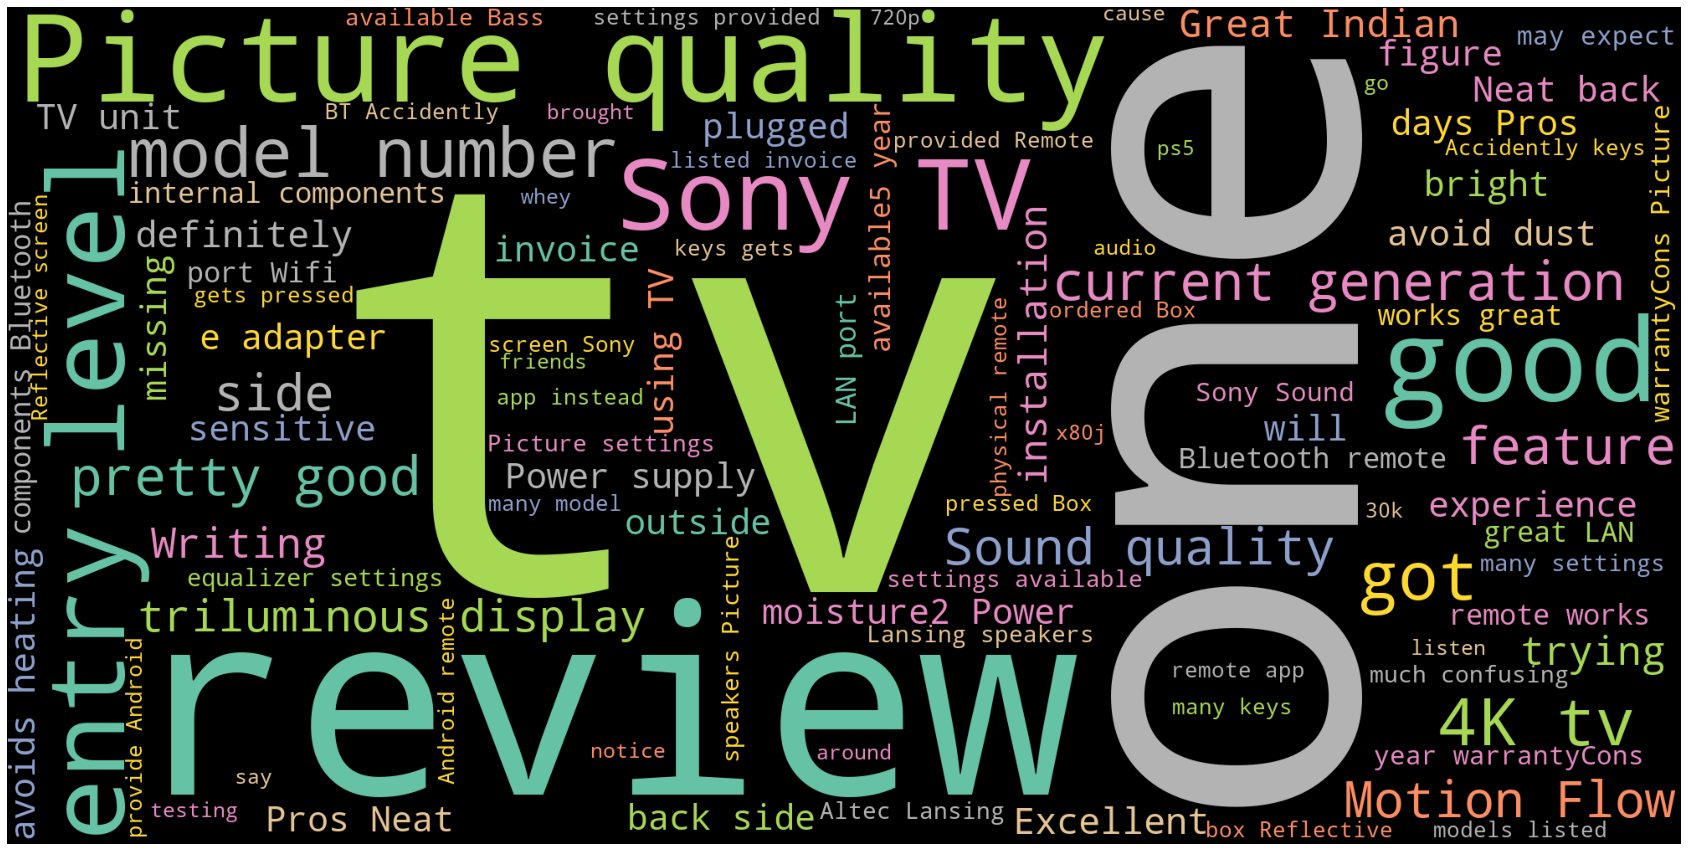

In [ ]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
  plt.figure(figsize=(30,30))
  plt.imshow(wordcloud)
  plt.axis("off");

#Generating wordcloud
stopwords = STOPWORDS
wordcloud = WordCloud(width = 2000, height = 1000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

#Emotion extraction 

In [ ]:
from textblob import TextBlob

In [ ]:
type(sonytv)

list

In [ ]:
# converting list into dataframe
data = pd.DataFrame(sonytv,columns=["reviwes"])
data

,reviwes
0,\nWriting this review after using TV for more ...
1,"\nBeen testing this tv for around a week now, ..."
2,\nI visited a showroom and found that the Sony...
3,\nGot this tv with a very good deal on Great I...
4,\nPros:Excellent Picture qualityDecent value f...
5,\nGot it for Rs.74k in the Great Indian Festiv...
6,\nWriting the below review after using it for ...
7,\nExcellent product but soft mode of the pictu...
8,"\nSuperb picture quality. Poor sound, definite..."
9,\nOverall OkPicture quality is good for a LEDS...


In [ ]:
# converting list into string
df_string = data.to_string()
df_string

"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              reviwes\n0      \\nWritin

In [ ]:
blob = TextBlob(df_string)
blob.sentiment

Sentiment(polarity=0.22959788359788366, subjectivity=0.4829920634920636)

In [ ]:
# using single reviwe statement from reviwe list for compairing
text = ("Been testing this tv for around a week now, Picture quality is good (i use soundbar for audio so cannot say about that, cause i have not listen to tv audio) This tv is good for tv series, movies and games.")
blob1 = TextBlob(text)
blob1.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

- After compairing a single reviwe statement with all reviwe list the sentiment polarity is high of single statement i.e. there are some negative reviwes also in our reviwe list

In [ ]:
#stop.txt
with open("stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

text_tokens = [w for w in text_tokens if not w in stopwords]

In [ ]:
# Joinining all the reviews into single paragraph 
text_token_para = " ".join(text_tokens)

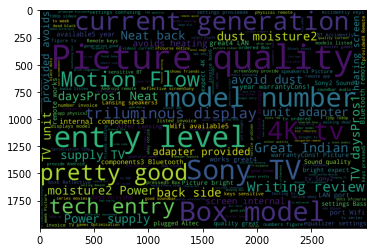

In [ ]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(text_token_para)

plt.imshow(wordcloud_ip)

In [ ]:
#positive.txt
with open("positive-words.txt","r") as pw:
  posiwords = pw.read().split("\n")

In [ ]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([i for i in text_tokens if i in posiwords])

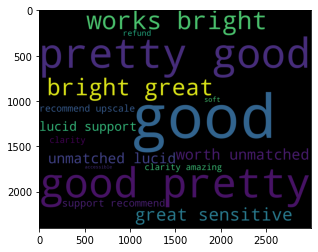

In [ ]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)